In [1]:

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
sc.version

'2.2.0'

In [2]:
scale = 1/200.0
samplesPerSecond = 100

WINDOW = 40   # 32 or 40 samples per window
WindowsPerFrame = 150 # 32 or 150 


samplesPerFrame = WindowsPerFrame * WINDOW
secondPerFrame = samplesPerFrame // samplesPerSecond

inputDataFile = "a02.dat"

codedFramesRootPath = "/user/fsainz/data/out/coded/"

frame2graph = "2017/12/14/16/25/42-59142752"

filesPath = codedFramesRootPath + frame2graph

In [3]:
print("Procesing: " + filesPath )

Procesing: /user/fsainz/data/out/coded/2017/12/14/16/25/42-59142752


In [14]:
eventsStrRdd = sc.textFile(filesPath)

In [15]:
eventsStrRdd.count
e = eventsStrRdd.first()

In [16]:
def getFields( line ):
    line = line[1:-1]  # get rid of parenthesis
    line = line.split(';')
    #ret = ret.split(',')
    srcFrame =  list(map(  lambda x: float(x) , line[1].split(',')))
    codedFrame =list(map( lambda x: float(x) , line[2].split(',')))
    lossFrame = list(map( lambda x: float(x) , line[3].split(',')))
    ret = line[0].split(',')
    ret = ret[:-1]
    ret.extend([srcFrame,codedFrame,lossFrame])
    ret[1] = float(ret[1])
    ret[2] = float(ret[2])
    ret[3] = float(ret[3])
    return ret
    # return (ret, srcFrame, codedFrame, lossFrame)

In [17]:
codedframesRdd = eventsStrRdd.map( lambda x: getFields(x)   )

In [20]:
nsamples = codedframesRdd.count()
sample = codedframesRdd.collect()

In [46]:
item=2
print( np.max(sample[item][5]),  np.max(sample[item][6]),  np.max(sample[item][7] ))

158.72 161.880009419 90.6117859953


In [47]:
len(sample[3][5])

6000

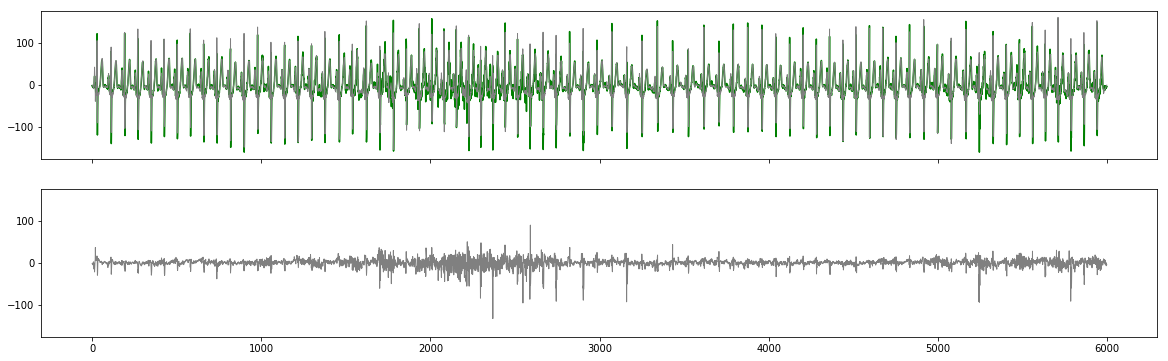

In [78]:

l = len(sample[item][5])
x = range(00,l)

fig, ax = plt.subplots(2,1,sharey=True, sharex=True,figsize=(20,6))

ax[0].plot(x, sample[item][5],"green")
ax[0].plot(x, sample[item][6], 'gray', linewidth=1)
ax[1].plot(x, sample[item][7], 'gray', linewidth=1)
display(fig)


In [76]:
item
from matplotlib import gridspec
f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})

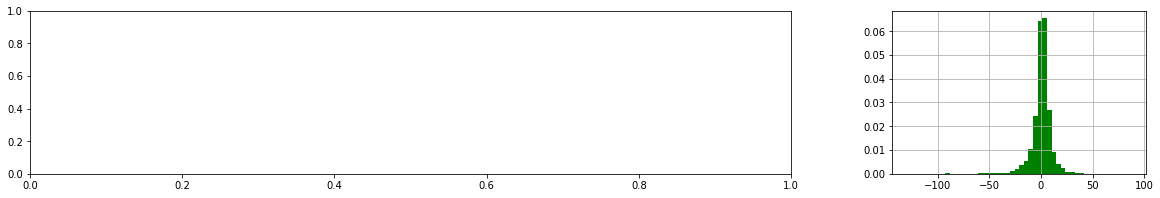

In [82]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)


fig, ax = plt.subplots(1,2,figsize=(20,3), gridspec_kw = {'width_ratios':[3, 1]})

# the histogram of the data
n, bins, patches = ax[1].hist( sample[item][7], 50, normed=1, facecolor='green' )
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
#l = ax[1].plot(bins, y, 'r--', linewidth=1)

#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
ax[1].grid(True)
display(fig)


In [58]:
len(bins)

51

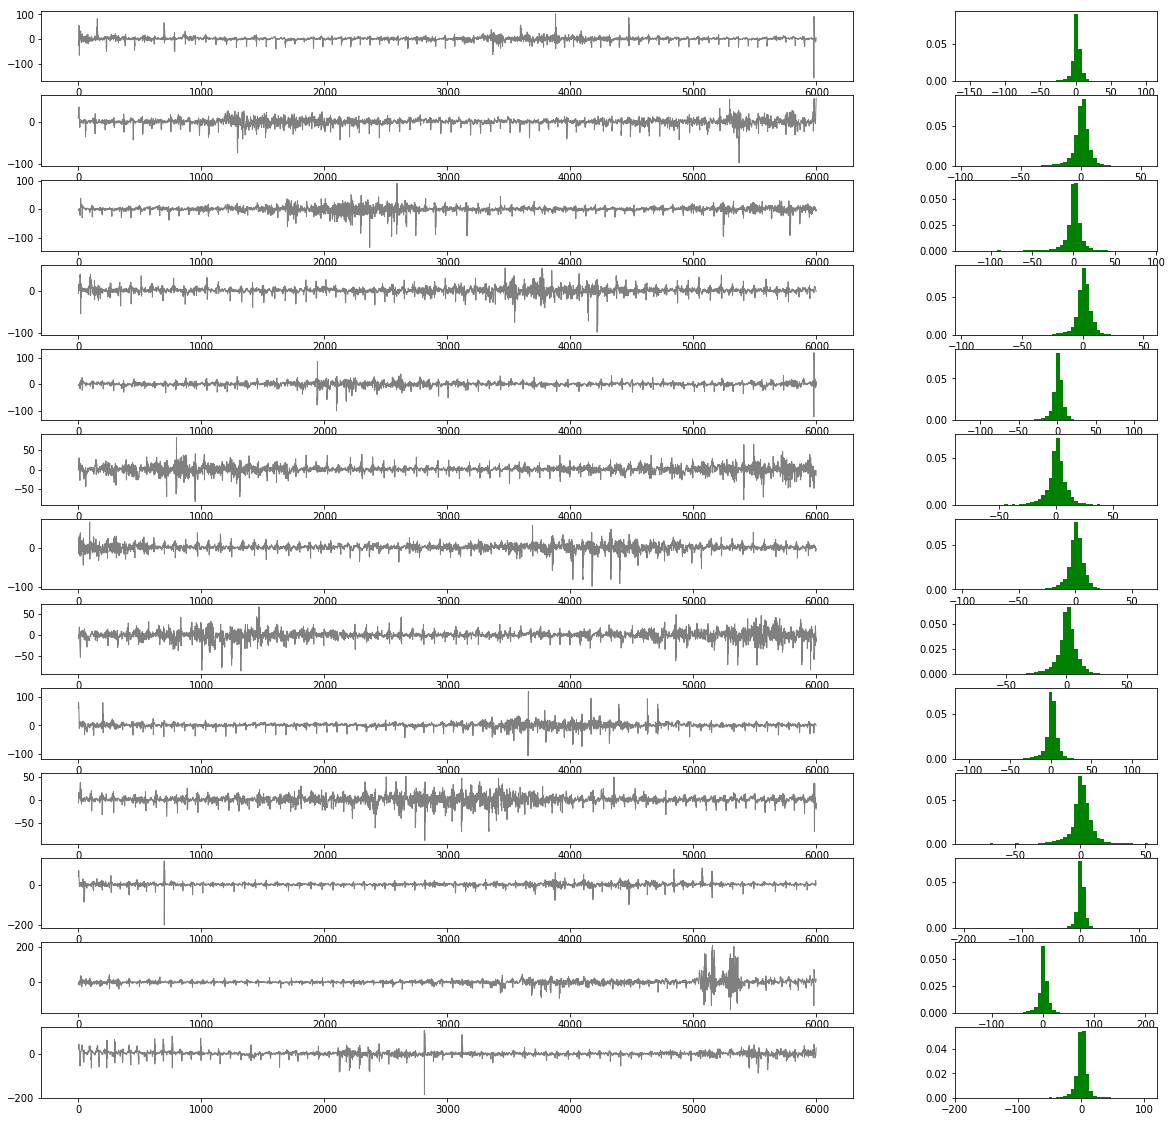

In [89]:

l = len(sample[item][5])
x = range(00,l)
nsamples = codedframesRdd.count()
fig, ax = plt.subplots(nsamples,2,figsize=(20,20), gridspec_kw = {'width_ratios':[4, 1]})
for item in range(0,nsamples):
    #ax[item].plot(x, sample[item][5], "green")
   # ax[0].plot(x, sample[item][6], 'gray', linewidth=1)
   ax[item][0].plot(x, sample[item][7], 'gray', linewidth=1)
   # the histogram of the data
   n, bins, patches = ax[item][1].hist( sample[item][7], 50, normed=1, facecolor='green')
                                                                                       
    
display(fig)

In [ ]:


x1 = 2200
x2 = 2400
l = len(sample[0][0][x1:x2])
x = range(x1,x2)
fig, ax = plt.subplots(2,1,sharey=True, sharex=True,figsize=(20,6))
ax[0].plot(x, sample[item][0][x1:x2],"green")
ax[0].plot(x, sample[item][1][x1:x2], 'gray', linewidth=1)
ax[1].plot(x, sample[item][2][x1:x2], 'gray', linewidth=1)
display(fig)

In [ ]:


x1 = 1
x2 = 200
l = len(sample[0][0][x1:x2])
x = range(x1,x2)
fig, ax = plt.subplots(2,1,sharey=True, sharex=True,figsize=(20,6))
ax[0].plot(x, sample[item][0][x1:x2],"green")
ax[0].plot(x, sample[item][1][x1:x2], 'gray', linewidth=1)
ax[1].plot(x, sample[item][2][x1:x2], 'gray', linewidth=1)
display(fig)